In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df  = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
del df['customerID']

In [42]:
df.head()
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [43]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [44]:
df = df[df.TotalCharges!=' ']
df.shape

(7032, 20)

In [45]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [47]:
df[df.Churn=='No'].tenure


0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

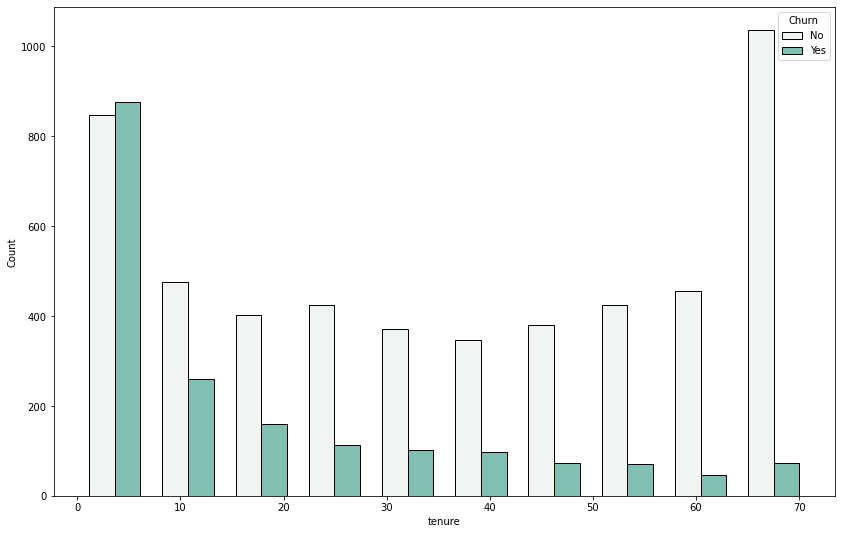

In [48]:
plt.figure(figsize=(14,9))
sns.histplot(x='tenure',hue='Churn',data=df,multiple="dodge",bins=10,shrink=.7,palette='light:#5A9')

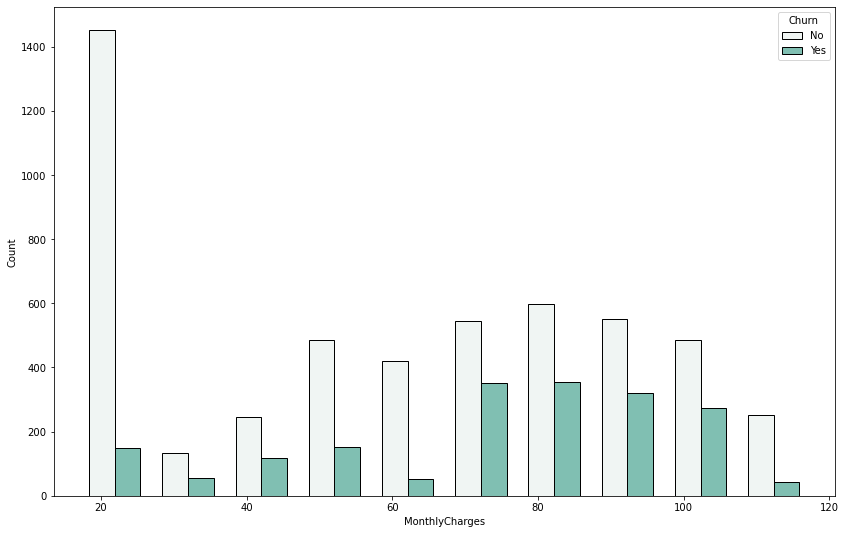

In [49]:
plt.figure(figsize=(14,9))
sns.histplot(x='MonthlyCharges',hue='Churn',data=df,multiple="dodge",bins=10,shrink=.7,palette='light:#5A9');a

In [50]:
cat_col = []
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            cat_col.append(column)
            print(f'{column} : {df[column].unique()}')
print_unique_col_values(df)
print(cat_col)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [51]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [52]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [53]:
cat_col = ['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']
one_hot_col = ['InternetService','Contract','PaymentMethod']

In [54]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
lb = LabelEncoder()
for i in cat_col:
    df[i] = lb.fit_transform(df[i])



In [55]:
df = pd.get_dummies(data=df,columns=one_hot_col)


In [57]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1


In [58]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [59]:
X = df.drop('Churn',axis='columns')
y =df['Churn']

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [61]:
X_train.shape

(5625, 26)

In [62]:
len(X_train.columns)

26

In [65]:
import tensorflow as tf
from tensorflow import keras

In [67]:
model = keras.Sequential([
    keras.layers.Dense(26,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 663us/step - loss: 0.6210 - accuracy: 0.6224
Epoch 2/100
176/176 [==============================] - 0s 670us/step - loss: 0.4455 - accuracy: 0.7825
Epoch 3/100
176/176 [==============================] - 0s 653us/step - loss: 0.4156 - accuracy: 0.7989
Epoch 4/100
176/176 [==============================] - 0s 659us/step - loss: 0.4283 - accuracy: 0.7950
Epoch 5/100
176/176 [==============================] - 0s 662us/step - loss: 0.4119 - accuracy: 0.8040
Epoch 6/100
176/176 [==============================] - 0s 669us/step - loss: 0.4095 - accuracy: 0.8076
Epoch 7/100
176/176 [==============================] - 0s 911us/step - loss: 0.4062 - accuracy: 0.8061
Epoch 8/100
176/176 [==============================] - 0s 744us/step - loss: 0.4071 - accuracy: 0.8100
Epoch 9/100
176/176 [==============================] - 0s 738us/step - loss: 0.4172 - accuracy: 0.7980
Epoch 10/100
176/176 [==============================] - 0s 811us/step - l

176/176 [==============================] - 0s 737us/step - loss: 0.3743 - accuracy: 0.8256
Epoch 80/100
176/176 [==============================] - 0s 731us/step - loss: 0.3906 - accuracy: 0.8125
Epoch 81/100
176/176 [==============================] - 0s 651us/step - loss: 0.3829 - accuracy: 0.8191
Epoch 82/100
176/176 [==============================] - 0s 681us/step - loss: 0.3805 - accuracy: 0.8126
Epoch 83/100
176/176 [==============================] - 0s 725us/step - loss: 0.3908 - accuracy: 0.8131
Epoch 84/100
176/176 [==============================] - 0s 696us/step - loss: 0.3854 - accuracy: 0.8163
Epoch 85/100
176/176 [==============================] - 0s 659us/step - loss: 0.3873 - accuracy: 0.8091
Epoch 86/100
176/176 [==============================] - 0s 721us/step - loss: 0.3862 - accuracy: 0.8172
Epoch 87/100
176/176 [==============================] - 0s 731us/step - loss: 0.3928 - accuracy: 0.8167
Epoch 88/100
176/176 [==============================] - 0s 659us/step - loss:

In [68]:
model.evaluate(X_test,y_test)


44/44 [==============================] - 0s 545us/step - loss: 0.4490 - accuracy: 0.7861


[0.4489820599555969, 0.7860696315765381]

In [69]:
yp = model.predict(X_test)
yp[:5]

array([[0.34059975],
       [0.49102664],
       [0.02089319],
       [0.7912552 ],
       [0.45386413]], dtype=float32)

In [70]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [72]:
y_test[0:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int32

In [74]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.65      0.56      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407

[[877 122]
 [179 229]]


Text(33.0, 0.5, 'Truth')

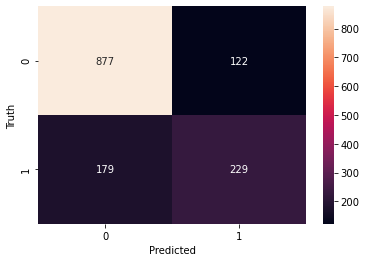

In [77]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')